In [1]:
import utils
from importlib import reload
import torch
import numpy as np
import PIL
from PIL import Image

def redo():
    reload(utils)

redo()

In [2]:
utils.init()

{'trained_betas'} was not found in config. Values will be initialized to default values.
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.13.mlp.fc2.bias', 'vision_model.encoder.layers.14.self_attn.out_proj.weight', 'vision_model.encoder.layers.23.self_attn.v_proj.weight', 'vision_model.encoder.layers.22.layer_norm2.weight', 'vision_model.encoder.layers.7.self_attn.q_proj.weight', 'vision_model.encoder.layers.9.layer_norm2.weight', 'vision_model.encoder.layers.17.self_attn.v_proj.bias', 'vision_model.encoder.layers.18.self_attn.q_proj.bias', 'vision_model.encoder.layers.4.mlp.fc2.weight', 'vision_model.encoder.layers.15.self_attn.k_proj.bias', 'vision_model.encoder.layers.16.layer_norm2.bias', 'vision_model.encoder.layers.17.self_attn.q_proj.weight', 'vision_model.encoder.layers.4.self_attn.k_proj.weight', 'vision_model.encoder.layers.5.layer_norm2.weight', 'vision_model.encoder.layers.23.

# USE CASES

## generate image from text

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

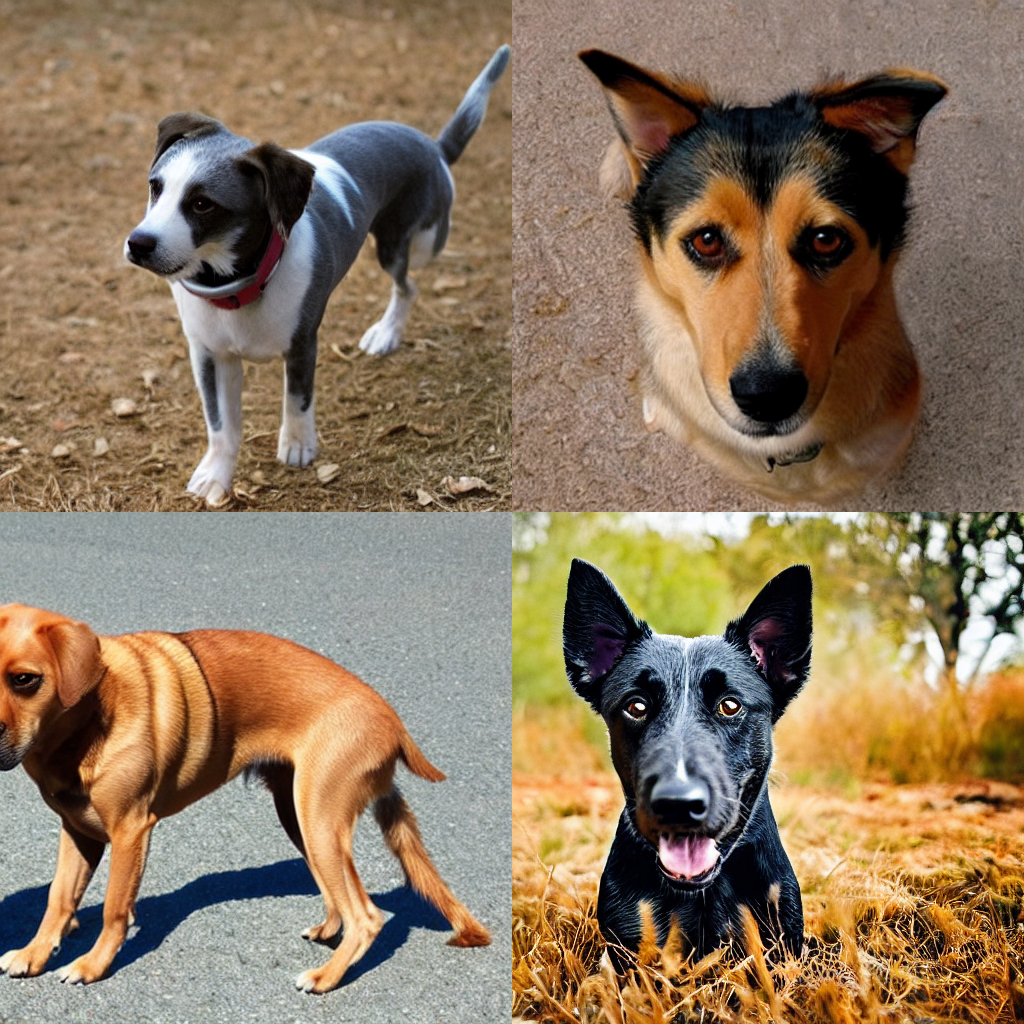

In [3]:
redo()
#prompt = "windstorm sand etched curio"
prompt = "dog"
ims = utils.im([prompt]*4)
utils.image_grid(ims, 2, 2)

In [4]:
# load image from disk and convert to numpy array
I = Image.open('imgs/gregg.jpeg')
I = I.resize((512, 512)) # resize to 512x512
x = np.asarray(I)
z = utils.encode(x)

In [5]:
type(z)

NoneType

## put image into model

In [22]:
redo()
# load image from disk and convert to numpy array
I = Image.open('imgs/gregg2.jpeg')
I = I.resize((512, 512)) # resize to 512x512
x = np.asarray(I)
z = utils.encode(x)
xp1 = utils.im("dog face", prior=z, start=10)
xp2 = utils.decode(z)

RuntimeError: CUDA out of memory. Tried to allocate 32.00 MiB (GPU 0; 23.69 GiB total capacity; 21.60 GiB already allocated; 13.12 MiB free; 21.81 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

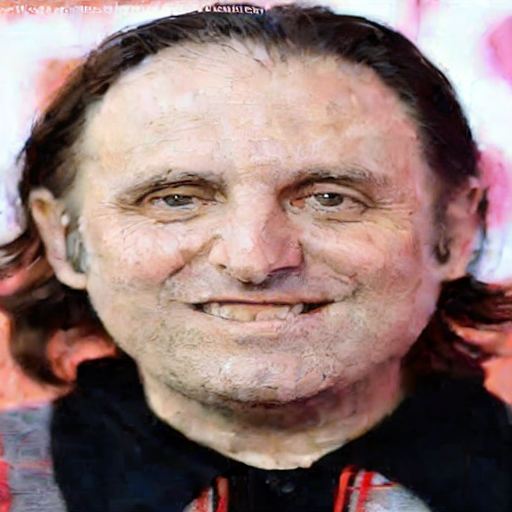

In [18]:
utils.decode(utils.perturb(z, 0.2))[0]

In [24]:
xp3 = utils.im("face of a man screaming in fear", start=10, prior=z)[0]

0it [00:00, ?it/s]

RuntimeError: CUDA out of memory. Tried to allocate 512.00 MiB (GPU 0; 23.69 GiB total capacity; 21.66 GiB already allocated; 13.12 MiB free; 21.81 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## perturb image in model and see the result

## move around latents and see what they code for

# SCRATCH